In [1]:
# Additional EDA, useful analysis will be copied to shared colab file

In [5]:
# Import clean df csv
# Import our dependencies
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

# Imports for Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
# Import our input dataset
df = pd.read_csv(r"C:\Users\aleah\Class\Final_Project\Hotel_Repo\Resources\clean_hotel_df.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [7]:
# How much do guests pay for a room per night?
df['adr'].mean()

102.00324252720587

In [10]:
# How does the price per night vary over the year?
price_per_month = df.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending=False)
price_per_month

arrival_date_month
August       140.116106
July         126.825223
June         116.712740
May          108.744701
September    105.095653
April        100.594148
October       88.099087
December      81.277622
March         80.905435
November      74.004627
February      73.815056
January       70.633827
Name: adr, dtype: float64

<AxesSubplot:title={'center':'Average Daily Rate Per Month'}, xlabel='arrival_date_month', ylabel='average_daily_rate (mean)'>

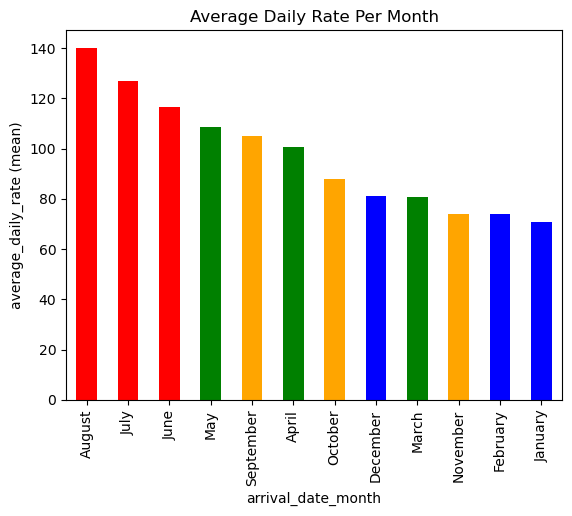

In [79]:
# Visualizing mean 'adr' per month, seasons represented by different colors
# Shows the highest (mean) adr is in summer months, lower (mean) adr occurs in winter months.
# Spring and fall months are generally mid-range in adr 
colors = ['red', 'red', 'red', 'green', 'orange', 'green', 'orange', 'blue', 'green', 'orange', 'blue', 'blue']

price_per_month.plot(kind='bar', ylabel='average_daily_rate (mean)', title='Average Daily Rate Per Month', color=colors)

In [39]:
df['lead_time'].describe()

count    118898.000000
mean        104.311435
std         106.903309
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [55]:
# Finding average lead_time in cancelled/confirmed bookings
cancelled_lead = df.loc[df['is_canceled'] == 1, 'lead_time']
cancelled_lead.describe()

count    44153.000000
mean       144.925305
std        118.636141
min          0.000000
25%         49.000000
50%        113.000000
75%        215.000000
max        629.000000
Name: lead_time, dtype: float64

In [56]:
confirmed_lead = df.loc[df['is_canceled'] == 0, 'lead_time']
confirmed_lead.describe()

count    74745.000000
mean        80.320209
std         91.188534
min          0.000000
25%          9.000000
50%         46.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

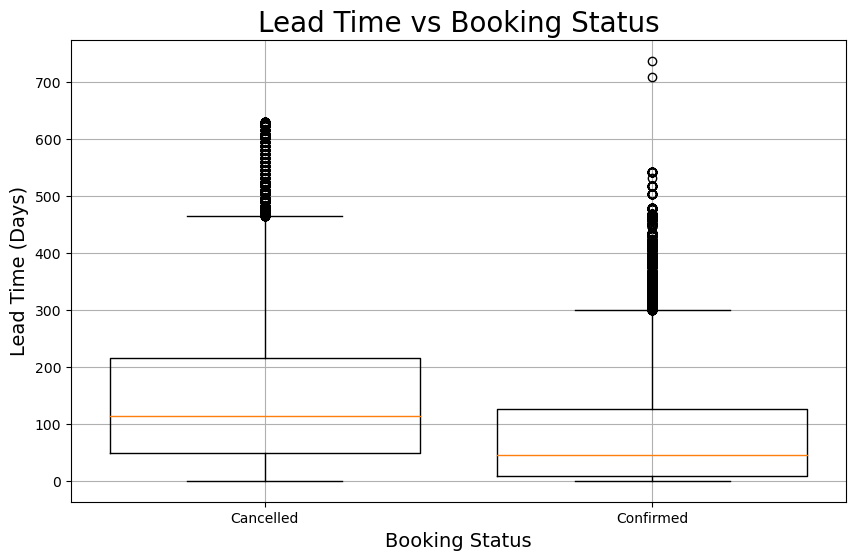

In [64]:
# Visualizing the spread of lead_time in cancelled vs confirmed (non-cancelled) bookings
# Cancelled bookings had a much higher mean lead time 
# The 'Confirmed' box plot's median line lies outside (below) the 'Cancelled' box indicating a difference in the groups
import numpy as np
x_labels = ["Cancelled", "Confirmed"]
lead_data = [cancelled_lead, confirmed_lead]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Lead Time vs Booking Status',fontsize=20)
ax.set_ylabel('Lead Time (Days)',fontsize=14)
ax.set_xlabel("Booking Status",fontsize=14)
ax.boxplot(lead_data, labels=x_labels, widths=(0.8, 0.8))
ax.grid()

In [65]:
# Splitting Dataset into Resort and City type

# Resort 
resort_df = df.loc[df['hotel'] == 'Resort Hotel']

# City
city_df = df.loc[df['hotel'] == 'City Hotel']

resort_cancelations_month = resort_df.groupby(['arrival_date_month']).sum()['is_canceled']

city_cancelations_month = city_df.groupby(['arrival_date_month']).sum()['is_canceled']


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_day_of_month       118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  meal                            118898 non-null  object 
 12  country         

In [83]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [103]:
df['meal'].head(30)

df.loc[df['meal'] == 'Undefined'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3105,Resort Hotel,0,105,2015,November,18,2,4,2,0.0,...,0,0,0,No Deposit,65,Transient-Party,69.0,0,0,Check-Out
3106,Resort Hotel,0,105,2015,November,18,2,4,2,0.0,...,0,0,0,No Deposit,65,Transient-Party,69.0,0,0,Check-Out
3107,Resort Hotel,0,105,2015,November,18,2,4,2,0.0,...,0,0,0,No Deposit,65,Transient-Party,69.0,0,0,Check-Out
3109,Resort Hotel,0,62,2015,November,18,2,4,2,0.0,...,0,0,0,No Deposit,0,Transient-Party,69.0,0,0,Check-Out
3110,Resort Hotel,0,105,2015,November,18,2,4,2,0.0,...,0,0,0,No Deposit,65,Transient-Party,69.0,0,0,Check-Out


In [108]:
country_counts = df.country.value_counts()
country_counts.head(10)

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

<AxesSubplot:ylabel='Density'>

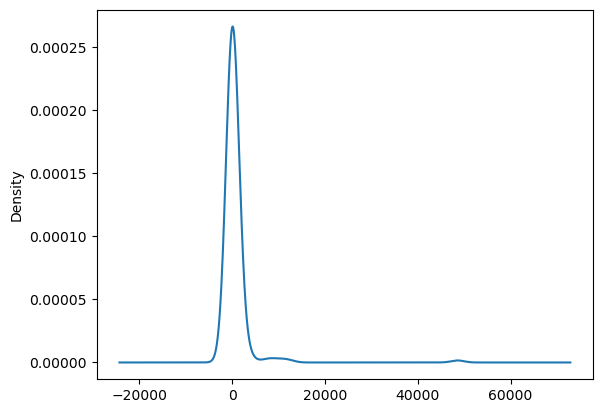

In [107]:
country_counts.plot.density()